### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable the the time differences that participants spend on between congruent and incongruent test.
The dependent variable is the time spend on congruent and incongruent test for the same participant. So the time difference and time spent on both tests depends on tested individuals.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The propriate set of hypotheses for this task is that the time difference each participants spends on two tests is independent from the time difference that other participants spend. Also the time differences for all participants are normally distributed. Finally, we assume that the samples we have is a fairly good representitive of the population that we're interested in.
We should perform a two tail paired T-test, with the null hypothesis as mean of time difference equals to 0 for the population. Because the time spent on congruent and incongruent tests for one participant is dependent, but we want to test if there is a statistically significant difference between the average time spent on different tests for the population. And we don't know the population's standard deviation (excluding z-test), we're not comparing variance (excluding F-test)

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display, HTML
df = pd.read_csv('stroopdata.csv')
#display(df)
diff_ = df['Incongruent'] - df['Congruent']
xbar = np.mean(diff_)
s = np.std(diff_,ddof=1)
print(xbar)
print(s)

7.96479166667
4.86482691036


the sample mean of time difference is 7.96479166667 and the sample standard deviation is 4.86482691036

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

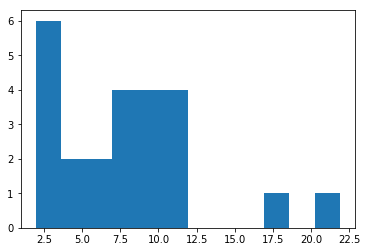

In [2]:
import matplotlib.pyplot as plt
# the histogram of the data
plt.hist(diff_, normed=False, bins=12)
plt.show()

From the histogram the time difference we can see that the normality assumption seems to be wrong. But since we have limited number of samples, we cannot infer the true distribution merely from this histogram.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [3]:
# we consider 95% confidence interval for mean. We have degree of freedom = n-1=23.
# Then the corresponding student distribution 
import math
n = len(diff_)
t = stats.t.interval(0.95, n-1)
coeff = t[0]*(s/math.sqrt(n))
test_sta = xbar/(s/math.sqrt(n))
ci = [xbar + coeff,xbar - coeff]
print(ci)
print(test_sta)
print(stats.ttest_1samp(diff_,0))

[5.9105554239684217, 10.01902790936491]
8.02070694411
Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)


For the paired T-test, we have 95% confidence level, critical statistic value is 8.02070694411, p-value equals to 4.1030005857111781e-08, leading us to reject the null hyphothesis. We have The 95% confidence interval of population mean is [5.9105554239684217, 10.01902790936491]. Therefore we reject the hyphothesis that time difference is zero mean. Personally I got 12s time difference between the two tests, it matches my expectation.